Training accuracy: 0.6203628219879176
Testing accuracy: 0.7019216491248129


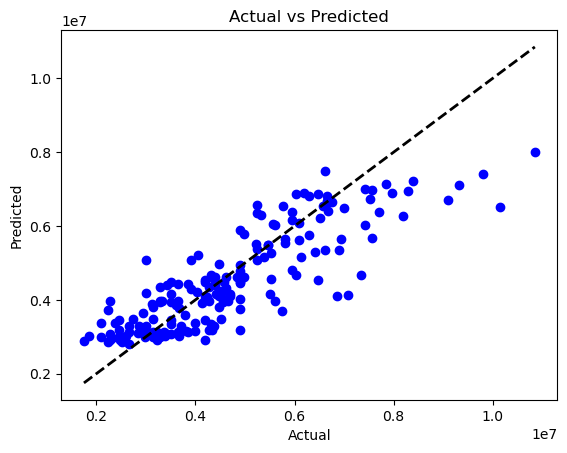

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data_set = pd.read_csv("Housing.csv")
data_set.replace({'mainroad': {'yes': 1, 'no': 0}}, inplace=True)
data_set.replace({'guestroom': {'yes': 1, 'no': 0}}, inplace=True)
data_set.replace({'basement': {'yes': 1, 'no': 0}}, inplace=True)
data_set.replace({'hotwaterheating': {'yes': 1, 'no': 0}}, inplace=True)
data_set.replace({'airconditioning': {'yes': 1, 'no': 0}}, inplace=True)
data_set.replace({'prefarea': {'yes': 1, 'no': 0}}, inplace=True)
data_set.replace({'furnishingstatus': {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}}, inplace=True)



X = data_set.iloc[:, 1:-1]
y = data_set.iloc[:, 0]



FeatureSel = SelectPercentile(score_func=f_classif, percentile=99)
X = FeatureSel.fit_transform(X, y)



scaler = StandardScaler()
X = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle=True)


knn_model = KNeighborsRegressor(n_neighbors=15, algorithm='auto', weights='uniform')
knn_model.fit(X_train, y_train)


print(f"Training accuracy: {knn_model.score(X_train, y_train)}")    # 0.6203628219879176
print(f"Testing accuracy: {knn_model.score(X_test, y_test)}")       # 0.7019216491248129



y_pred = knn_model.predict(X_test)


plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
